In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd 
import sys 
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_uv_map,plot_map_zoom,plot_map_multizoom

In [3]:
# Select geostrophy and product 

time_target='2019-01-02'

box_cal = [-135, -115, 20, 50]
box_med = [-5.6, 16.8, 34.6, 44.6]
box_gs = [-80, 0, 30, 60 ]
box_agulhas = [0, 60, -50, -30]
box_NA = [-40, 0, 48, 68]

box_mozemb = [30, 54,-35, -6]
box_kuro = [125, 170, 25, 45]

In [10]:

import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
fsize=12
plt.rcParams.update({'font.size': 12})

def plot_map_multizoom(var,lon,lat,title=None,vmax=None,vmin=None,colorbar_label=None,axs=None,fig=None,list_zoom_extent=[[-20, 0, 40, 60]],cmap='RdBu_r',list_zoom_ax = [[0.25, 0.10, 0.5, 0.5]],lat_mask=None,lognorm=None,cbox='w',box=None):

    proj = ccrs.Robinson()

    if not axs:
        fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': proj},
                        figsize=(11*1,7.5*1.5))
        #p0 = plt.pcolormesh(lon2D, lat2D, norm_uv, cmap='jet',vmax=1)
    #vmax_glob=np.nanmax(var)
    #vmin_glob=np.nanmin(var)
    
    proj = ccrs.PlateCarree()

    if lat_mask is not None :
        axs.hlines(lat_mask,-180,180,color='k', alpha=1, linestyle='--')
        axs.hlines(-lat_mask,-180,180,color='k', alpha=1, linestyle='--')

    if lognorm:
        p0 = plt.pcolormesh(lon, lat, var, cmap=cmap,norm=LogNorm(vmin=vmin, vmax=vmax))
    else:  
        p0 = plt.pcolormesh(lon, lat, var, cmap=cmap,vmax=vmax,vmin=vmin,transform=proj)

    if title:
        axs.set_title(title)

    axs.coastlines(resolution='10m', lw=0.5)
    #axs.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#EEEEEE', edgecolor='face',alpha=1)


    # optional add grid lines
    p0.axes.gridlines(color='white', alpha=0.2, linestyle='--', linewidth=1,zorder=10)

    # draw parallels/meridiens and write labels
    gl = p0.axes.gridlines(crs=proj, draw_labels=True,
                            linewidth=0.1, color='black', alpha=0.5, linestyle='--')
    import cartopy
    # projection = cartopy.crs.Mercator()
    axs.add_feature(cartopy.feature.LAND, zorder=3)
    axs.add_feature(cartopy.feature.COASTLINE, zorder=3)
    axs.add_feature(cartopy.feature.LAKES, alpha=0.5, zorder=3)
    axs.add_feature(cartopy.feature.RIVERS, zorder=3)
    
    # adjust labels to taste
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = True
    gl.left_labels = True

    #gl.xlabels_bottom = False
    gl.ylocator = mticker.FixedLocator([-60, -40, -20, 0, 20, 40, 60])
    gl.xlocator = mticker.FixedLocator([-120, -60, 0,  60, 120])

    # Activer les lignes aux positions spécifiées
    gl.ylines = True
    gl.xlines = True
    #gl.xformatter = LONGITUDE_FORMATTER
    #gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': fsize, 'color': 'black'}
    gl.ylabel_style = {'size': fsize, 'color': 'black'}

    
    #axs.set_extent([np.min(lon), np.max(lon), np.min(lat), np.max(lat)], crs=proj)
    #axs.set_extent([-178, 178, np.min(lat), np.max(lat)], crs=proj)

    #get size and extent of axes:
    axpos = axs.get_position()
    pos_x = axpos.x0+axpos.width + 0.01# + 0.25*axpos.width
    pos_y = axpos.y0
    cax_width = 0.02
    cax_height = axpos.height
    #create new axes where the colorbar should go.
    #it should be next to the original axes and have the same height!
    pos_cax = fig.add_axes([pos_x,pos_y,cax_width,cax_height])
    cbar=plt.colorbar(p0, cax=pos_cax)
    if colorbar_label:
        cbar.set_label(colorbar_label)

    #zoom_extent = [-20, 0, 40, 60]  # Exemple de zoom sur l'Europe
   
    for zoom_ax,zoom_extent in zip(list_zoom_ax,list_zoom_extent):

        lon_mg,lat_mg = np.meshgrid(lon,lat)
        var_f = np.where(lat_mg > zoom_extent[2] , var, np.nan)
        var_f = np.where(lat_mg < zoom_extent[3] , var_f, np.nan)
        var_f = np.where(lon_mg < zoom_extent[1] , var_f, np.nan)
        var_f = np.where(lon_mg > zoom_extent[0] , var_f, np.nan)

        if not(vmax):
            vmax=np.nanmax(var_f)
            vmin=np.nanmin(var_f)


        # Ajouter un zoom sur une région spécifique
        ax_zoom = fig.add_axes(zoom_ax, projection=proj)
        ax_zoom.set_extent(zoom_extent, crs=proj)  # Exemple de zoom sur l'Europe
        ax_zoom.coastlines()

        if lognorm:
            contour_zoom = ax_zoom.pcolormesh(lon, lat, var, cmap=cmap,transform=proj,norm=LogNorm(vmin=vmin, vmax=vmax))
        else: 
            contour_zoom = ax_zoom.pcolormesh(lon, lat, var, cmap=cmap,transform=proj,vmax=vmax,vmin=vmin)

        # projection = cartopy.crs.Mercator()
        ax_zoom.add_feature(cartopy.feature.LAND, zorder=3)
        ax_zoom.add_feature(cartopy.feature.COASTLINE, zorder=3)
        ax_zoom.add_feature(cartopy.feature.LAKES, alpha=0.5, zorder=3)
        ax_zoom.add_feature(cartopy.feature.RIVERS, zorder=3)
        #cax = fig.add_axes([ax_zoom.get_position().x1+0.01,ax_zoom.get_position().y0,0.02,ax_zoom.get_position().height])
        #cax = fig.add_axes([ax_zoom.get_position().x0,ax_zoom.get_position().y0-0.03,ax_zoom.get_position().width,0.02])
        #cbar = plt.colorbar(contour_zoom,cax=cax,orientation="horizontal")


        # Ajouter les contours de la zone zoomée sur la carte principale
        zoom_rect = plt.Rectangle((zoom_extent[0], zoom_extent[2]),
                                zoom_extent[1] - zoom_extent[0],
                                zoom_extent[3] - zoom_extent[2],
                                linewidth=2, edgecolor=cbox, facecolor='none',
                                transform=proj,zorder=5)
        axs.add_patch(zoom_rect)
    if box:
                # Ajouter les contours de la zone zoomée sur la carte principale
        zoom_rect = plt.Rectangle((box[0], box[2]),
                                box[1] - box[0],
                                box[3] - box[2],
                                linewidth=2, edgecolor=cbox, facecolor='none',
                                transform=proj,zorder=5)
        axs.add_patch(zoom_rect)

In [5]:
box_cal = [-135, -115, 20, 50]
box_med = [-5.6, 16.8, 34.6, 44.6]
box_gs = [-80, -43, 25, 46.5 ]
box_agulhas = [11, 33, -44, -27]
box_NA = [-40, 0, 48, 68]
box_hawai = [-170, -120, 10, 40]

list_box = [box_hawai,box_gs,box_agulhas]
list_box = [box_gs,box_agulhas]
list_zoom_ax = [[0.1, 0.55, 0.5, 0.5],[0.3, -0.11, 0.5, 0.5],[0.1, 0.8, 0.5, 0.5]]
list_zoom_ax = [[0.1, 0.55, 0.5, 0.5],[0.3, -0.11, 0.5, 0.5]]

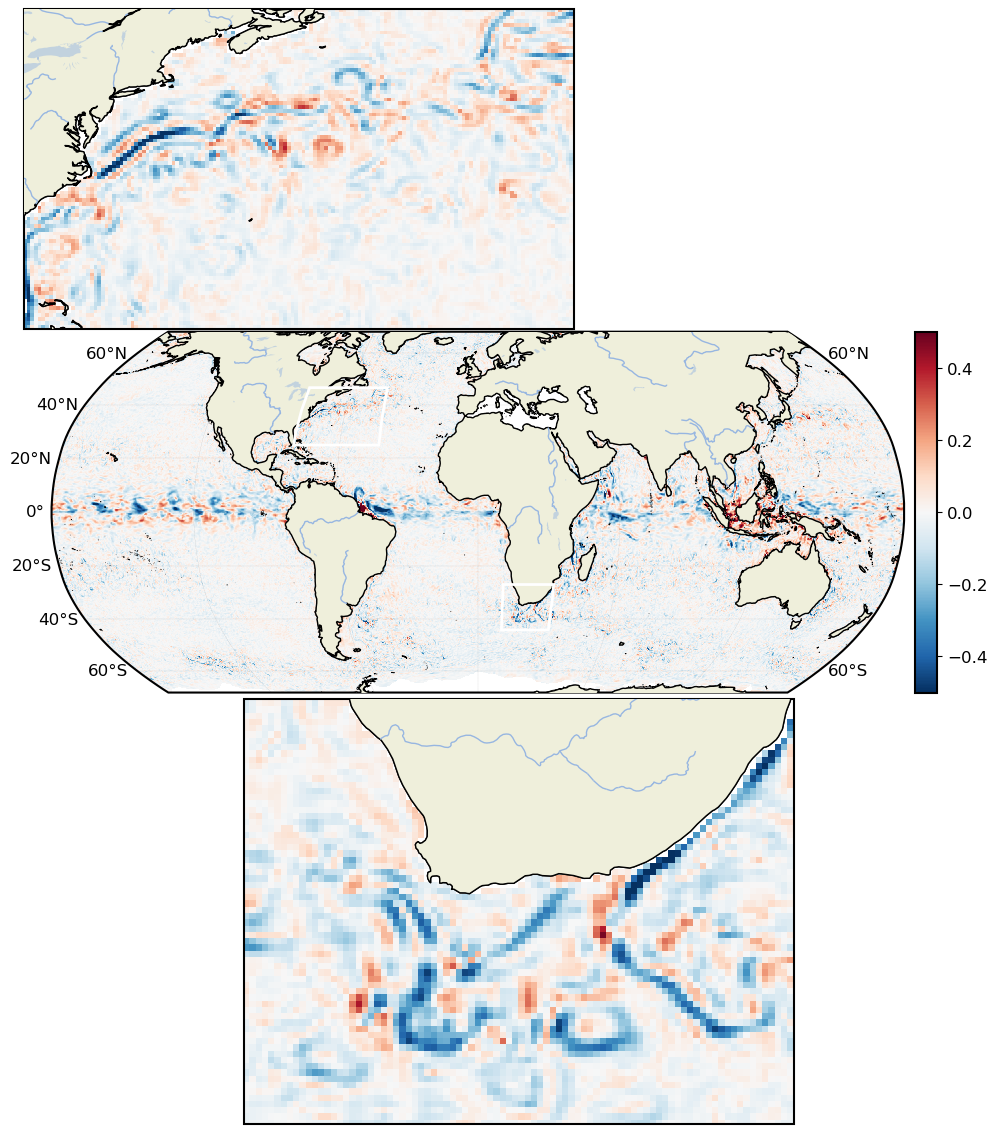

In [99]:
date_target ="2019-11-15"
list_of_maps = f"/Odyssey/private/t22picar/multivar_drifter/rec/unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet/daily/unet_rec_{date_target}.nc"
imt = xr.open_dataset(list_of_maps).isel(lat=slice(4, -4)) #.isel(lon=slice(4, -4))
ec_imt = np.sqrt(imt.ugos**2 + imt.vgos**2)
ec_imt_int = ec_imt.interpolate_na(dim="lon", method="nearest", fill_value="extrapolate")

#GlobCUrrent 
#list_of_maps = sorted(glob("/Odyssey/private/t22picar/multivar_drifter/rec/unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet/daily/unet_rec_*.nc"))
#imt = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')

list_of_maps = f"/Odyssey/private/t22picar/multivar_drifter/rec/globcurrent_15m_4th/daily/unet_rec_{date_target}.nc"
gc = xr.open_dataset(list_of_maps).isel(lat=slice(4, -4)) #.isel(lon=slice(4, -4))
ec_gc = np.sqrt(gc.ugos**2 + gc.vgos**2)
ec_gc = ec_gc.interp(lon=ec_imt_int.lon,lat=ec_imt_int.lat)

vmax=0.5
cmap=plt.cm.magma
cbox="white"
plot_map_multizoom(ec_gc-ec_imt_int,ec_gc.lon,ec_gc.lat,vmin=-vmax,vmax=vmax,list_zoom_ax=list_zoom_ax,list_zoom_extent=list_box,cmap=plt.cm.RdBu_r,cbox=cbox)


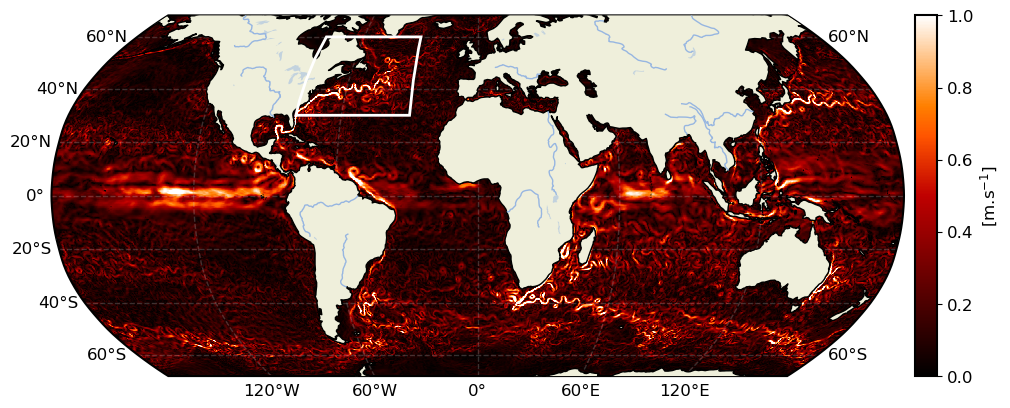

In [14]:
# Year mean 
box_gs = [-80, -30, 30, 60]

from glob import glob 
date_target="2019-02-02"
#list_of_maps = sorted(glob("/Odyssey/private/t22picar/multivar_drifter/rec/unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet/daily/unet_rec_*.nc"))
#imt = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
list_of_maps = f"/Odyssey/private/t22picar/multivar_drifter/rec/unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet/daily/unet_rec_{date_target}.nc"
imt = xr.open_dataset(list_of_maps).isel(lat=slice(4, -4)) #.isel(lon=slice(4, -4))
ec_imt = np.sqrt(imt.ugos**2 + imt.vgos**2)
ec_imt_int = ec_imt.interpolate_na(dim="lon", method="nearest", fill_value="extrapolate")
vmax=1
cmap=plt.cm.magma
cmap=plt.cm.gist_heat
cbox="white"
title="IMT-OSC$_{duacs}$ current speed"
plot_map_multizoom(ec_imt_int,ec_imt.lon,ec_imt.lat,vmin=0,vmax=vmax,list_zoom_ax=[],list_zoom_extent=[],cmap=cmap,cbox=cbox,box=box_gs,colorbar_label="[m.s$^{-1}$]")
plt.savefig(f"../figures/Figure_norm_speed.png", dpi = 300,bbox_inches='tight')

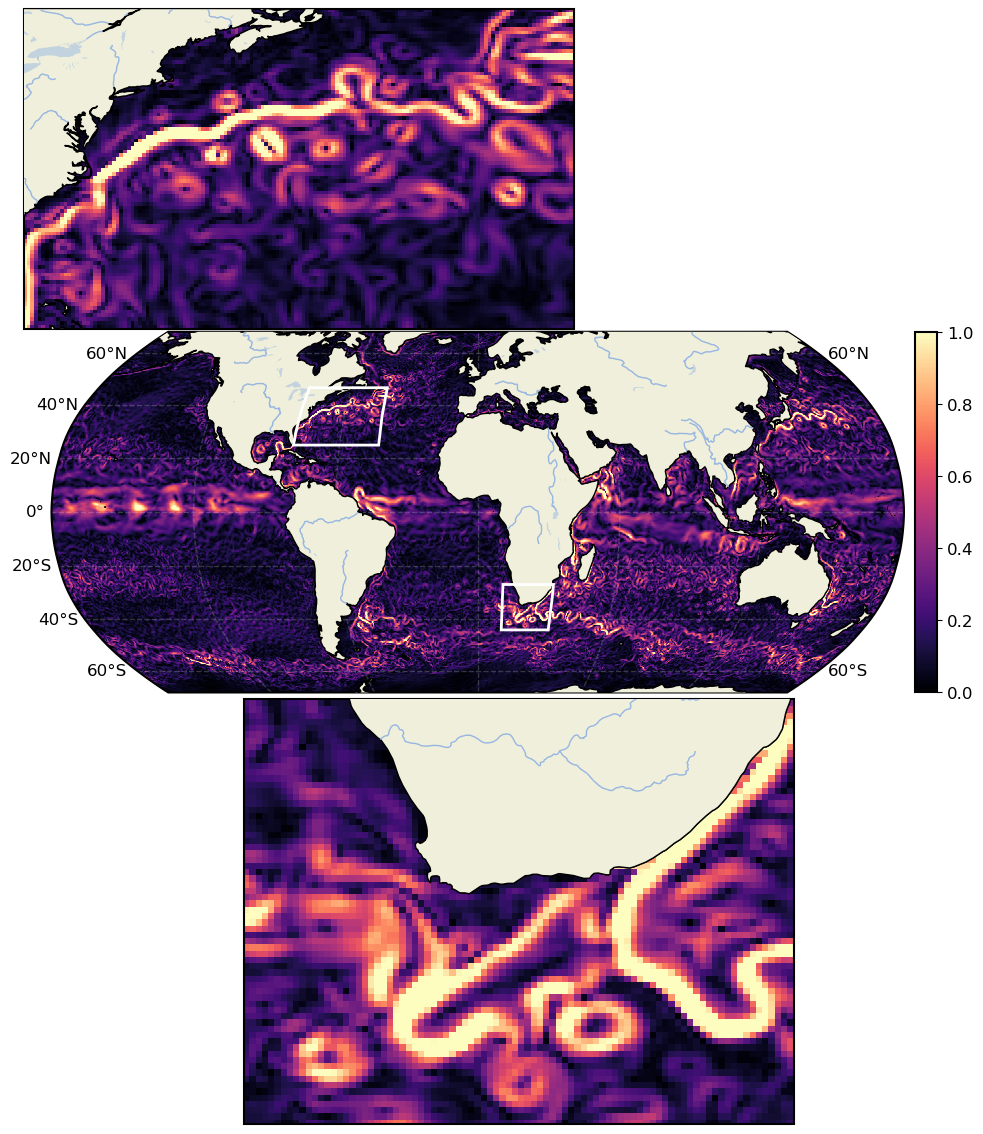

In [101]:
vmax=1
cmap=plt.cm.magma
cbox="white"
plot_map_multizoom(ec_imt_int,ec_imt.lon,ec_imt.lat,vmin=0,vmax=vmax,list_zoom_ax=list_zoom_ax,list_zoom_extent=list_box,cmap=cmap,cbox=cbox)

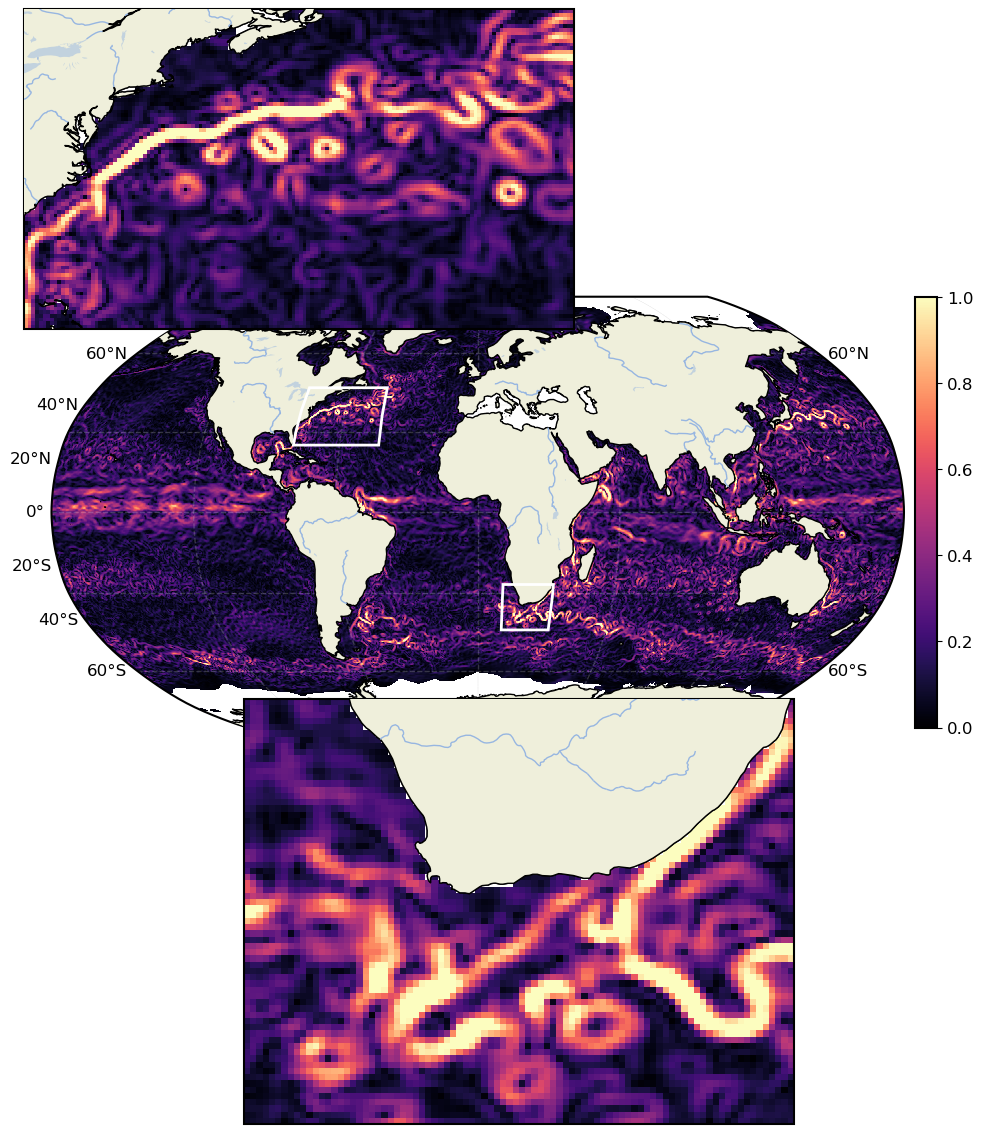

In [102]:
#GlobCUrrent 
#list_of_maps = sorted(glob("/Odyssey/private/t22picar/multivar_drifter/rec/unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet/daily/unet_rec_*.nc"))
#imt = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')

list_of_maps = f"/Odyssey/private/t22picar/multivar_drifter/rec/globcurrent_15m_4th/daily/unet_rec_{date_target}.nc"
gc = xr.open_dataset(list_of_maps).isel(lat=slice(4, -4)) #.isel(lon=slice(4, -4))
ec_gc = np.sqrt(gc.ugos**2 + gc.vgos**2)

vmax=1
cmap=plt.cm.magma
cbox="white"
plot_map_multizoom(ec_gc,ec_gc.lon,ec_gc.lat,vmin=0,vmax=vmax,list_zoom_ax=list_zoom_ax,list_zoom_extent=list_box,cmap=cmap,cbox=cbox)

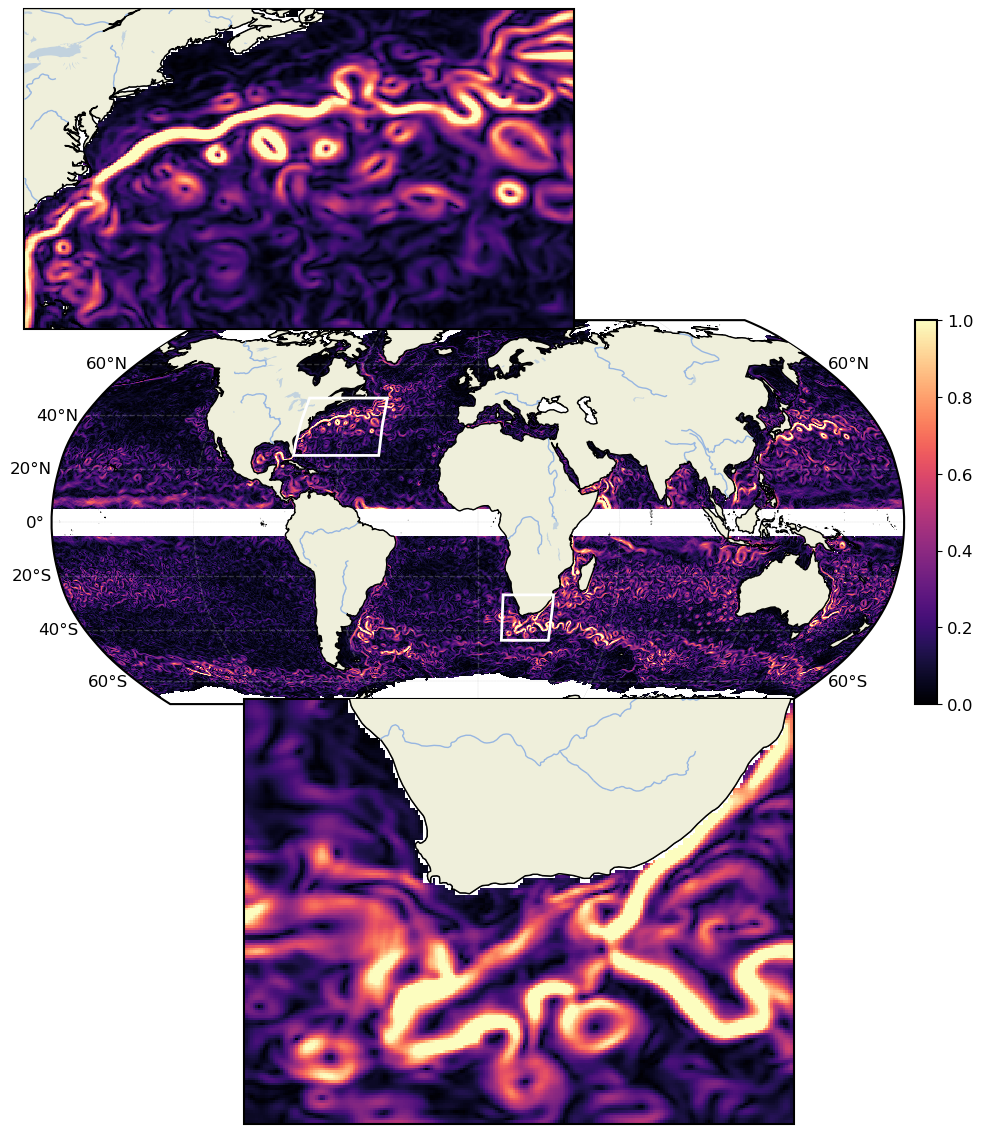

In [109]:
#GlobCUrrent 
#list_of_maps = sorted(glob("/Odyssey/private/t22picar/multivar_drifter/rec/unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet/daily/unet_rec_*.nc"))
#imt = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')

list_of_maps = f"/Odyssey/private/t22picar/multivar_drifter/rec/neurost_sst_ssh_15m_10th/daily/unet_rec_{date_target}.nc"
neu = xr.open_dataset(list_of_maps).isel(lat=slice(4, -4)) #.isel(lon=slice(4, -4))
ec_neu = np.sqrt(neu.ugos**2 + neu.vgos**2)

vmax=1
cmap=plt.cm.magma
cbox="white"
plot_map_multizoom(ec_neu,ec_neu.lon,ec_neu.lat,vmin=0,vmax=vmax,list_zoom_ax=list_zoom_ax,list_zoom_extent=list_box,cmap=cmap,cbox=cbox)

In [111]:
import datetime 
import xarray 



def get_sst_L4_8th(date_target,box):
    lon_min, lon_max, lat_min, lat_max = box
    date_target = datetime.datetime.strptime(date_target, "%Y-%m-%d") + datetime.timedelta(days=5)
    result_filepath = "/Odyssey/private/t22picar/data/sst_L4/SST_L4_OSTIA_2010-01-01-2022-01-01_8th.nc"
    map = xarray.open_dataset(result_filepath).sel(time=date_target)["thetao"].sel(lon=slice(lon_min,lon_max)).sel(lat=slice(lat_min,lat_max))
    return map

import xarray
def get_sst_L3_8th(date_target,box):
    lon_min, lon_max, lat_min, lat_max = box
    date_target = datetime.datetime.strptime(date_target, "%Y-%m-%d") + datetime.timedelta(days=5)
    result_filepath = "/Odyssey/private/t22picar/data/sst_L3/SST_L3_2010-01-01-2020-01-01_8th.nc"
    map = xarray.open_dataset(result_filepath).sel(time=date_target)["thetao"].sel(lon=slice(lon_min,lon_max)).sel(lat=slice(lat_min,lat_max))
    return map

def get_sst_L4_4th_log(date_target,box):
    lon_min, lon_max, lat_min, lat_max = box
    date_target = datetime.datetime.strptime(date_target, "%Y-%m-%d") + datetime.timedelta(days=5)
    result_filepath = "/Odyssey/private/t22picar/data/sst_L4/SST_L4_OSTIA_2019_4th.nc"
    map = xarray.open_dataset(result_filepath).sel(time=date_target)["thetao"].sel(lon=slice(lon_min,lon_max)).sel(lat=slice(lat_min,lat_max))
    du_dx = (np.abs(map.differentiate("lon")))
    du_dy = (np.abs(map.differentiate("lat")))
    grad = np.log(du_dx + du_dy)
    map.values = grad
    return map


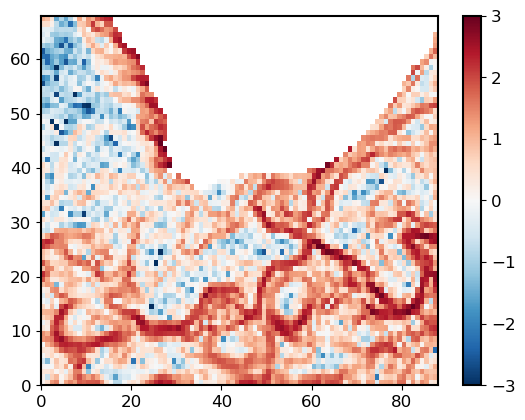

In [118]:
date_target ="2019-11-15"
sst_map = get_sst_L4_4th_log(date_target,box_agulhas)
plt.pcolormesh(sst_map,cmap=plt.cm.RdBu_r,vmax=3,vmin=-3)
plt.colorbar()

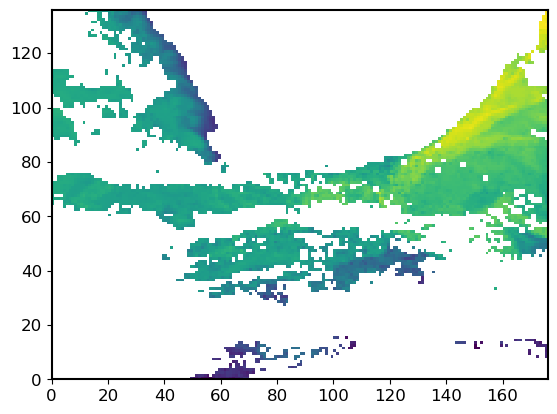

In [121]:
date_target ="2019-11-16"
sst_map = get_sst_L3_8th(date_target,box_agulhas)
plt.pcolormesh(sst_map)

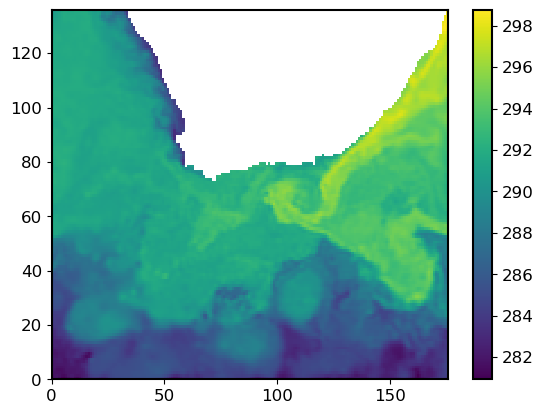

In [110]:
date_target ="2019-11-15"
sst_map = get_sst_L4_8th(date_target,box_agulhas)
plt.pcolormesh(sst_map)
plt.colorbar()

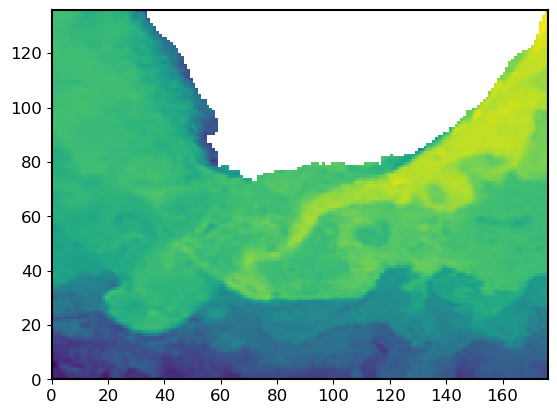

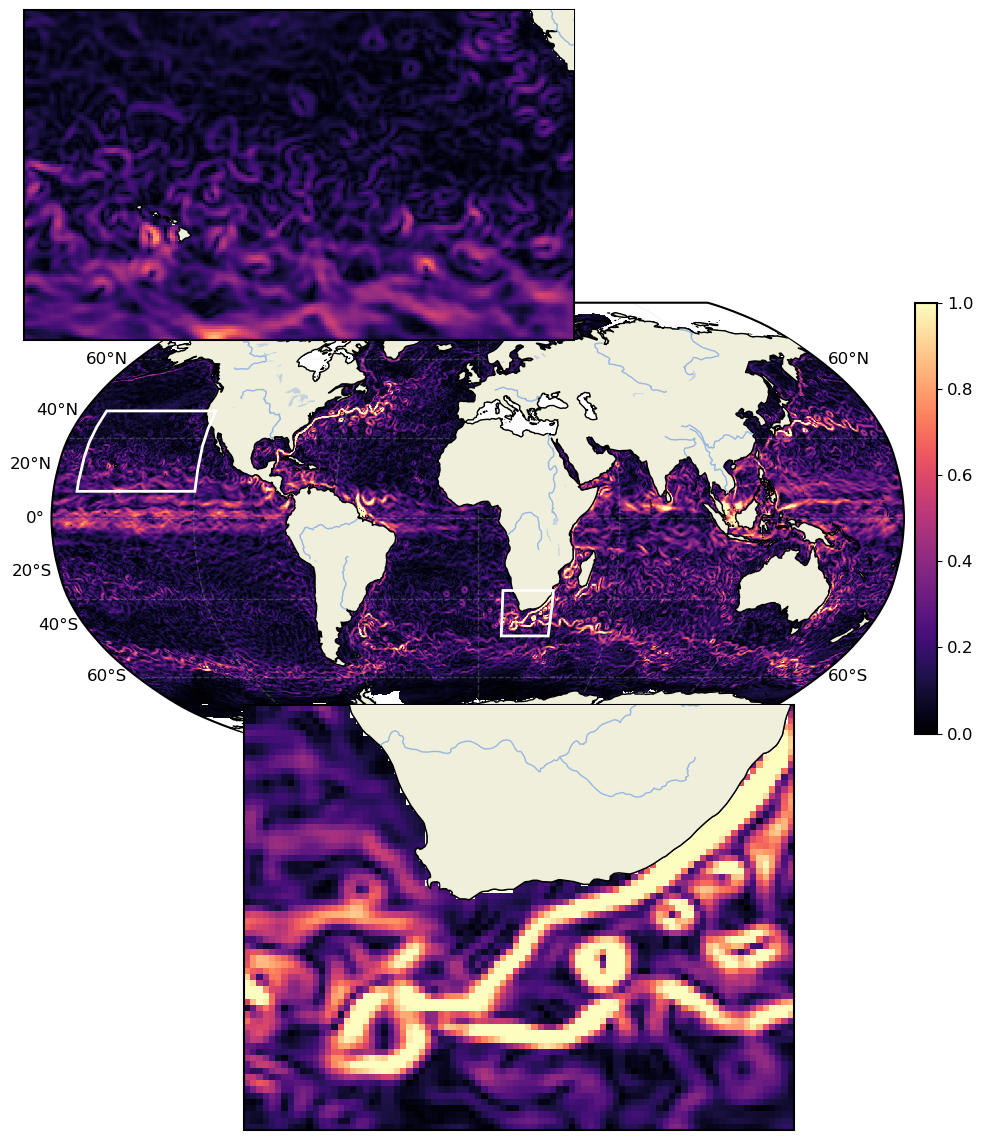

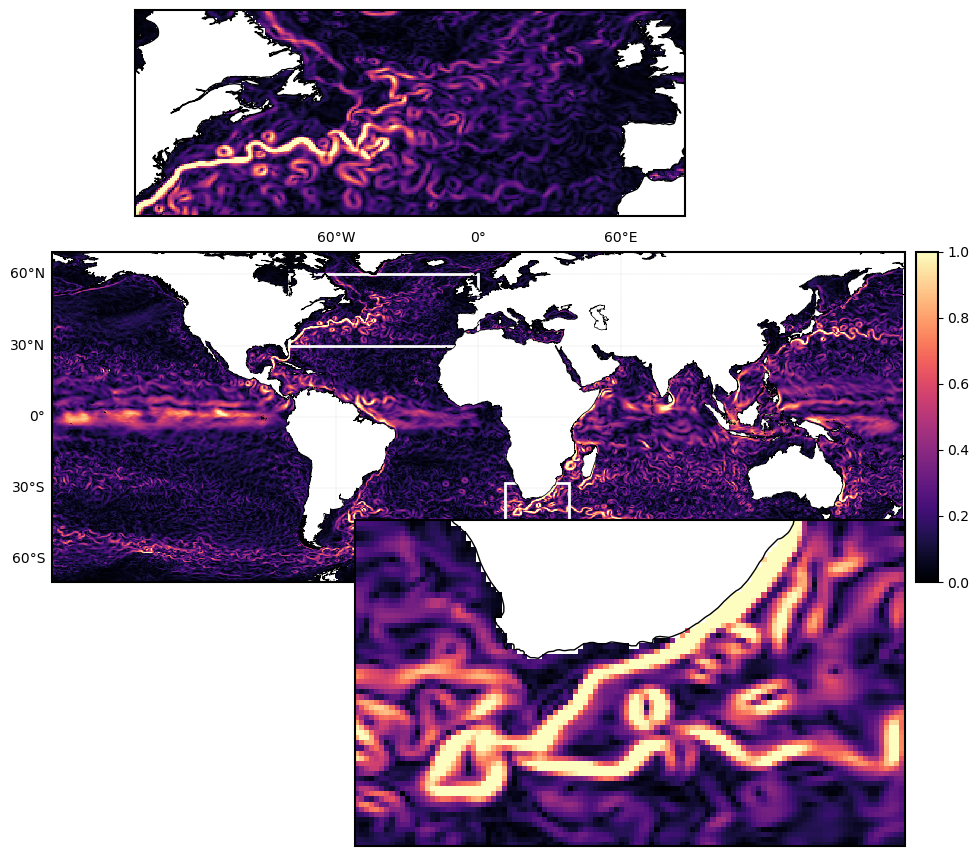

In [6]:
box_agulhas = [11, 38, -44, -28]
list_zoom_extent=[box_gs,box_agulhas]
list_zoom_ax = [[0.2, 0.65, 0.5, 0.5],[0.4, -0.11, 0.5, 0.5]]
vmax=1
cmap=plt.cm.magma
cbox="white"
plot_map_multizoom(ec_imt,ec_imt.lon,ec_imt.lat,vmin=0,vmax=vmax,list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent,cmap=cmap,cbox=cbox)

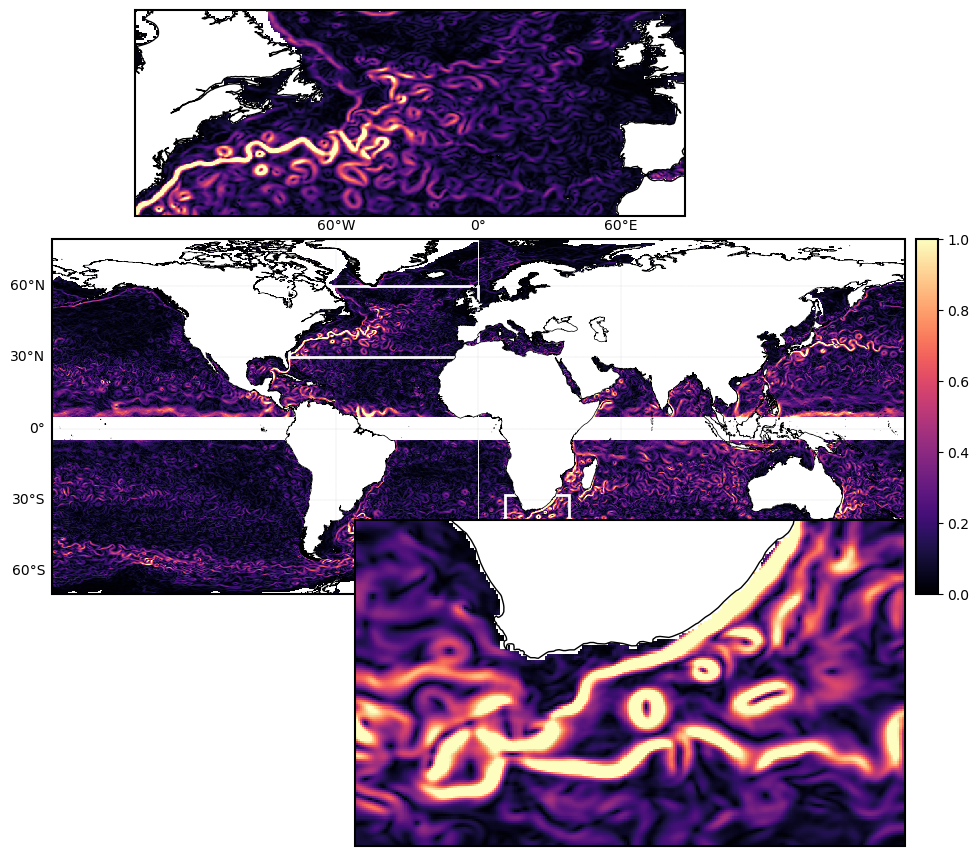

In [7]:
#Neurost 10th
list_of_maps = "/Odyssey/private/t22picar/multivar_drifter/rec/neurost_sst_ssh_15m_10th/daily/unet_rec_2019-01-02.nc"
imt = xr.open_dataset(list_of_maps).isel(lat=slice(2, -2)).isel(lon=slice(2, -2))
ec_imt = np.sqrt(imt.ugos**2 + imt.vgos**2)
plot_map_multizoom(ec_imt,ec_imt.lon,ec_imt.lat,vmin=0,vmax=vmax,list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent,cmap=cmap,cbox=cbox)